In [1]:
# Dimensionality Reduction - Understand and practice principal component analysis using scikit learn

In [2]:
#1. Scikit learn comes with pre-loaded dataset, load the digits dataset from that collection and write a helper function 
# to plot the image using matplotlib

In [3]:
import matplotlib.pyplot as plot
%matplotlib inline

import sklearn
from sklearn.datasets import  load_digits

digits = load_digits()

In [4]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [5]:
X = digits.data
y = digits.target

In [6]:
def plot_digit(x,index):
    plot.imshow(x.reshape(8,8))
    print(index)

4


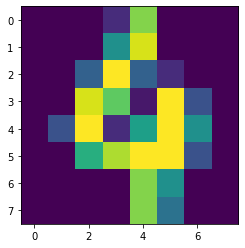

In [7]:
plot_digit(X[100],y[100])


In [8]:
#2. Make a train -test split with 20% of the data set aside for testing. Fit a logistic regression model and observe the 
# accuracy.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)

(1437, 64)


In [10]:
from sklearn.linear_model import LogisticRegression


In [11]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_predict,y_test)
print(accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9694444444444444


In [12]:
#3. Using scikit learn perform a PCA transformation such that the transformed dataset can explain 95% of the variance in 
# the original dataset. Find out the number of components in the projected subspace

In [13]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=0.95)
sklearn_pca.fit(X_train)

X_train_transformed = sklearn_pca.transform(X_train)

print(X_train_transformed.shape)
print(X_test.shape)



X_test_transformed =sklearn_pca.transform(X_test)
print(X_test_transformed.shape)

(1437, 28)
(360, 64)
(360, 28)


In [14]:
#4. Transform the dataset and fit a logistic regression and observe the accuracy. Compare it with the previous model 
# and comment on the accuracy

In [15]:
lr = LogisticRegression(penalty='l1')
lr.fit(X_train_transformed,y_train)
y_predict = lr.predict(X_test_transformed)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_predict,y_test)
print(accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9805555555555555


In [16]:
sklearn_pca.explained_variance_

array([176.25219806, 162.27844722, 140.97668344, 103.55187264,
        70.38843868,  59.14843949,  51.1314358 ,  43.73488583,
        40.87599877,  36.77769212,  28.4836322 ,  26.70870056,
        21.96750616,  21.59897219,  18.03292618,  16.65025739,
        15.77968654,  14.90021201,  12.22895905,  11.29792946,
        10.71329183,   9.68812829,   9.19074224,   8.46335199,
         8.45761581,   7.08692941,   6.78470994,   6.09793341])

In [17]:
#5. Compute the confusion matrix and count the number of instances that has gone wrong. 
# For each of the wrong sample,plot the digit along with predicted and original label.

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
print (confusion_matrix(y_predict,y_test))

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  1  0 30  0  1  2  1]
 [ 0  1  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  0]
 [ 0  0  0  0  0  0  0  1 27  0]
 [ 0  0  0  0  0  0  0  0  0 33]]


In [20]:
import numpy as np

In [21]:
np.where(y_predict != y_test)

(array([108, 116, 126, 173, 248, 249, 267], dtype=int64),)

5 8
8
[5]


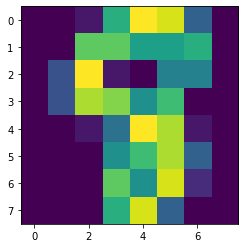

In [22]:
index=267
print(y_predict[index],y_test[index])
plot_digit(X_test[index],y_test[index])
print(lr.predict(X_test_transformed[index].reshape(1,-1)))


In [23]:
print(y_test.shape)

(360,)


In [24]:
351/360

0.975